In [8]:
from __future__ import division

import numpy as np
from scipy.io import loadmat
from scipy.optimize import minimize
%matplotlib inline

import matplotlib.pyplot as plt

### =========== Part 1: Loading and Visualizing Data =============

In [2]:
dam_data = loadmat('ex5data1.mat')
print dam_data.keys()
features = dam_data['X'].ravel()
y = dam_data['y'].ravel()
m = features.shape[0]
print features.shape, y.shape

['ytest', 'yval', '__header__', '__globals__', 'Xtest', 'Xval', 'y', 'X', '__version__']
(12,) (12,)


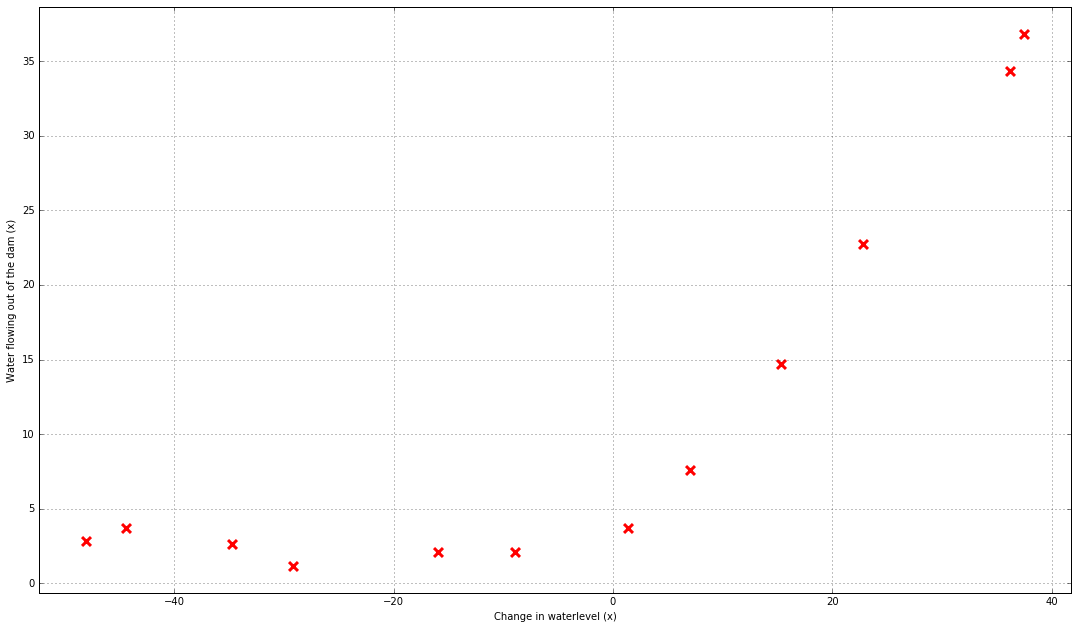

In [3]:
plt.scatter(features,y, c='r',marker='x', s=80, linewidth=3.)

plt.xlabel('Change in waterlevel (x)')
plt.ylabel('Water flowing out of the dam (x)')

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
#fig.savefig('test2png.png', dpi=100)
plt.autoscale(tight=True)
plt.grid()
plt.show()

###  =========== Part 2: Regularized Linear Regression Cost =============

In [4]:
def linear_reg_cost_function(theta, X, y, _lambda):
    m = y.size
    if theta.ndim != 1:
        return
    theta_tmp = theta[:, np.newaxis]
    hX = X.dot(theta_tmp)
    
    regularization_term = (_lambda/(2*m)) * np.sum((theta_tmp*theta_tmp)[1:])
    return np.sum((hX-y)**2)/(2*m) + regularization_term

theta = np.array([1, 1])
J = linear_reg_cost_function(theta, np.c_[np.ones((m)), features], y[:, np.newaxis], 1)

print 'Cost at theta = [1 ; 1]: %f \n(this value should be about 303.993192)\n', J

Cost at theta = [1 ; 1]: %f 
(this value should be about 303.993192)
303.99319222


###  =========== Part 3: Regularized Linear Regression Gradient =============

In [5]:
def linear_reg_gradient(theta, X, y, _lambda):
    m = y.size
    if theta.ndim != 1:
        return
    
    theta_tmp = theta[:, np.newaxis]
    hX = X.dot(theta_tmp)
#     print hX.shape, y.shape, theta_tmp.shape
    grad = X.T.dot(hX-y)/m +  (_lambda/m)*np.r_[[[0]],theta_tmp[1:]]
    return grad.ravel()
    
    
    
    
theta = np.array([1,1])
grad = linear_reg_gradient(theta, np.c_[np.ones((m)), features], y[:, np.newaxis], 1)

print 'Gradient at theta = [1 ; 1]:  [%f; %f] \n(this value should be about [-15.303016; 598.250744])\n', grad

Gradient at theta = [1 ; 1]:  [%f; %f] 
(this value should be about [-15.303016; 598.250744])
[ -15.30301567  598.25074417]


###  =========== Part 4: Train Linear Regression =============

In [6]:
def trainLinearReg(X, y, _lambda):
    initial_theta = np.zeros((X.shape[1]))
    res = minimize(fun=linear_reg_cost_function, x0 =initial_theta, 
               args=(X, y, _lambda), method='CG', 
               jac=linear_reg_gradient, options={'maxiter':200})
    return res.x

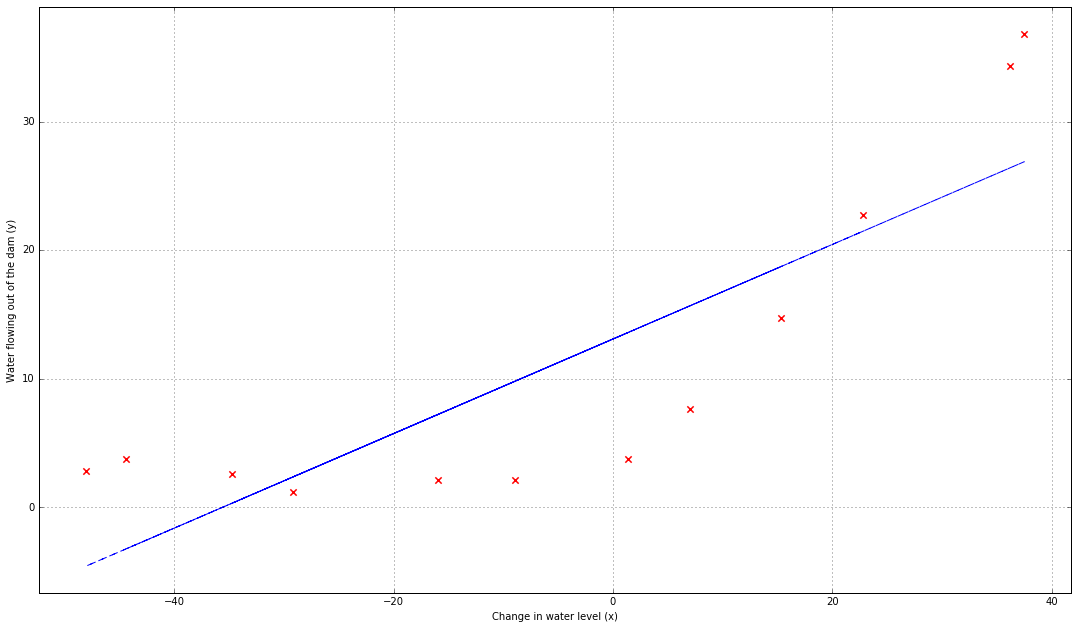

In [7]:
features = dam_data['X'].ravel()
param = trainLinearReg(np.c_[np.ones((m)), features], y[:, np.newaxis], 0)
y = dam_data['y'].ravel()
m = features.shape[0]

#  Plot fit over the data
plt.scatter(features, y, c='r',marker='x',s=40, linewidths=1.5) #, ,  
plt.xlabel('Change in water level (x)');
plt.ylabel('Water flowing out of the dam (y)');

plt.plot(features, np.c_[np.ones((m)),features].dot(param[:, np.newaxis]), '--', 
         linewidth= 1, label='curve fitting')

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
#fig.savefig('test2png.png', dpi=100)
plt.autoscale(tight=True)
plt.grid()

plt.show()

###  =========== Part 5: Learning Curve for Linear Regression =============

[ 0.00837049 -0.13339852] --- 2.52435489671e-29 --- 205.121095745
[ 3.29319566  0.07271775] --- 1.4559414082e-28 --- 110.300366108
[ 14.15498881   0.53912265] --- 3.2865950455 --- 45.0102318103
[ 14.62429829   0.55985727] --- 2.8426776894 --- 48.3689113698
[ 17.21375092   0.44974972] --- 13.1540488092 --- 35.8651411238
[ 15.40484629   0.45741708] --- 19.4439625125 --- 33.82995682
[ 14.26677698   0.4368173 ] --- 20.0985216551 --- 31.9709867845
[ 14.62343992   0.42312838] --- 18.1728586952 --- 30.8624463238
[ 13.29661011   0.41299409] --- 22.609405425 --- 31.135997955
[ 13.85366299   0.37780979] --- 23.2614615926 --- 28.9362074683
[ 12.93724155   0.36342988] --- 24.317249588 --- 29.551431622
[ 13.08790351   0.36777923] --- 22.3739064951 --- 29.4338181299


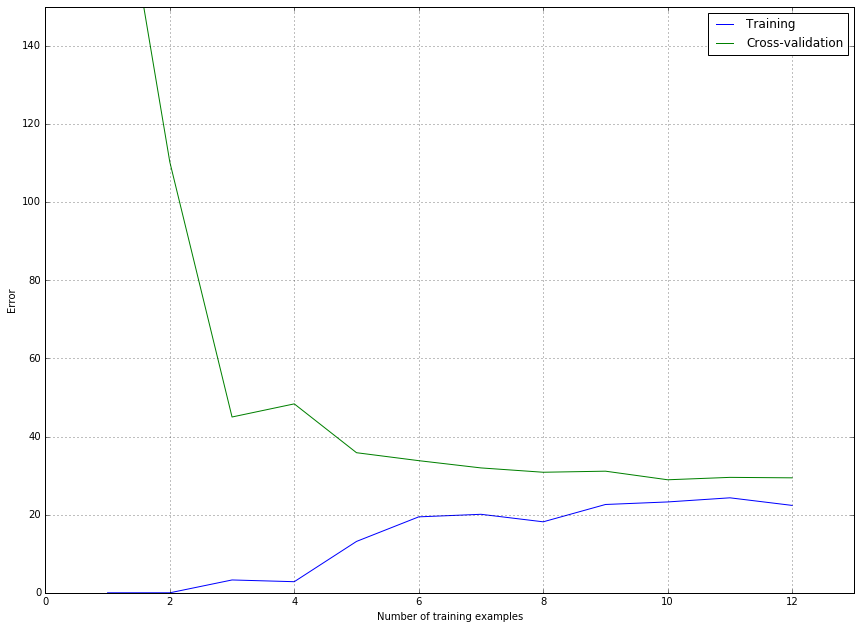

In [8]:
Xtrain = dam_data['X'].ravel()
ytrain = dam_data['y'].ravel()

Xval = dam_data['Xval'].ravel()
yval = dam_data['yval'].ravel()

J_train_values = list()
J_cv_values = list()
for i in np.arange(1, m+1):
    param = trainLinearReg(np.c_[np.ones((i)), features[:i]], y[:i][:, np.newaxis], 0)
    #print param.shape
    J_train = linear_reg_cost_function(param, np.c_[np.ones((m)), Xtrain][:i,:], ytrain[:, np.newaxis][:i,:], 0)
    J_cv = linear_reg_cost_function(param, np.c_[np.ones((yval.size)), Xval], yval[:, np.newaxis], 0)
    
    J_train_values.append(J_train)
    J_cv_values.append(J_cv)
    print param, 3*'-', J_train,3*'-', J_cv

    
plt.plot(np.arange(1, m+1), J_train_values, label='Training')
plt.plot(np.arange(1, m+1), J_cv_values, label='Cross-validation')
plt.legend()


fig = plt.gcf()
fig.set_size_inches(14.5, 10.5)
#fig.savefig('test2png.png', dpi=100)
#plt.autoscale(tight=True)

plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.grid()
plt.axis([0, 13, 0, 150])
plt.show()

### =========== Part 6: Feature Mapping for Polynomial Regression =============

In [9]:
def poly_features(features, dimension):
    new_features = np.zeros((features.size, dimension))
    for i in np.arange(dimension):
        new_features[:,i] = np.power(features,i+1)
    else:
        return new_features

def features_normalize(features):
    if features.ndim == 2:
        col_count = features.shape[1]
    
    mu = np.mean(features, axis=0)
    features_norm = features-mu
    sigma = np.std(features_norm, axis=0, ddof=1)
    
    return np.divide(features_norm, sigma), mu, sigma

# def feature_map(features, dimension, mu, sigma):
#     features_poly = poly_features(features, p)
#     normalized = np.divide(features_poly-mu, sigma)
#     return np.c_[np.ones((normalized.shape[0])), normalized]
    
    

### Feature Mapping (AKA Feature Normalization) via Scikit-learn

In [13]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

fts = np.random.randint(1000, size=(4,2)) #  examples X features
print(fts)

mms = MinMaxScaler()
print(mms.fit_transform(fts))

ss = StandardScaler()      # as andrew's mean=0 and std = 1
print(ss.fit_transform(fts))

[[444 740]
 [653 898]
 [600 639]
 [932 894]]
[[ 0.          0.38996139]
 [ 0.42827869  1.        ]
 [ 0.31967213  0.        ]
 [ 1.          0.98455598]]
[[-1.20991691 -0.48279455]
 [-0.02411323  0.96330098]
 [-0.32481943 -1.40719739]
 [ 1.55884957  0.92669097]]


/home/disooqi/anaconda2/envs/ztdl/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/disooqi/anaconda2/envs/ztdl/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [40]:
p = 8
features_poly = poly_features(features, p)
normalized_features_poly, features_mu, features_std = features_normalize(features_poly)
#print features_mu, features_std

X_poly = np.c_[np.ones((normalized_features_poly.shape[0])), normalized_features_poly]
X_poly.shape

# Map X_poly_test and normalize (using mu and sigma)
Xtest = dam_data['Xtest'].ravel()
X_poly_test = poly_features(Xtest, p)
#X_poly_test = bsxfun(@minus, X_poly_test, mu);
#X_poly_test = bsxfun(@rdivide, X_poly_test, sigma);
X_poly_test = np.divide(X_poly_test-features_mu, features_std)
X_poly_test = np.c_[np.ones((X_poly_test.shape[0])), X_poly_test]

# Map X_poly_val and normalize (using mu and sigma)
Xval = dam_data['Xval'].ravel()
X_poly_val = poly_features(Xval, p)
X_poly_val = np.divide(X_poly_val-features_mu, features_std)
X_poly_val = np.c_[np.ones((np.size(X_poly_val, 0))), X_poly_val]   

###  =========== Part 7: Learning Curve for Polynomial Regression =============

[ 11.9015781    7.80642255   5.1187512    5.27538895   3.58994921
   3.24122509   2.44070037   1.85427668   1.67585909]
(100, 9) (9,)


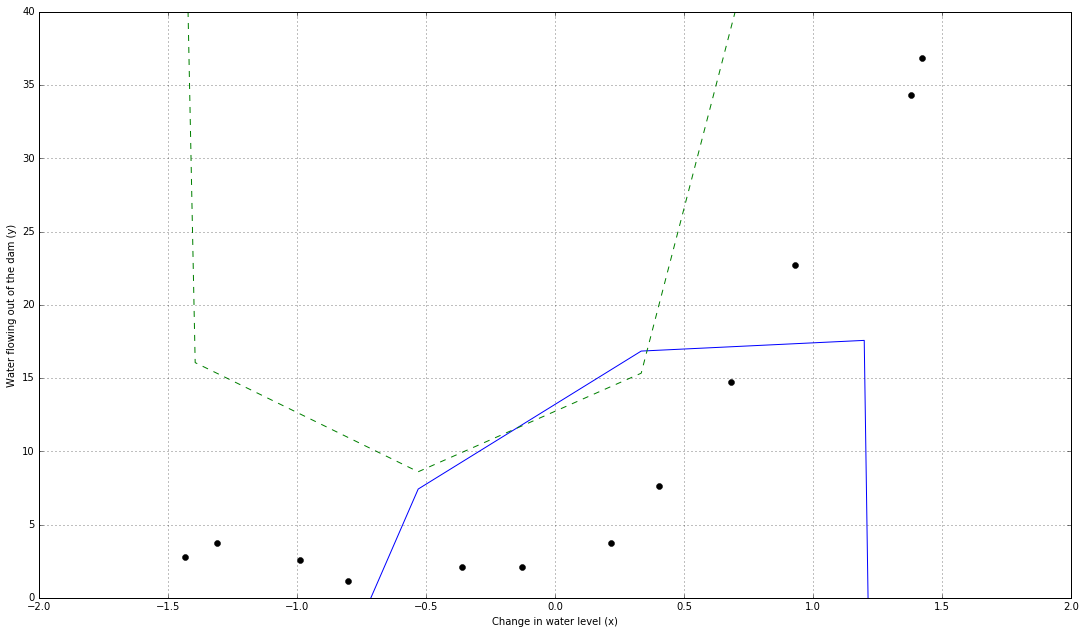

In [77]:
_lambda = 0
#XX = np.c_[np.ones((m)), features]
param_poly = trainLinearReg(X_poly, y[:, np.newaxis], _lambda)
print param_poly
#print X_poly
param_octave = np.array([ [11.2176],[11.2813],[14.7554],[11.4739],[-12.4539],[-15.3507],
    [7.6451], [3.9019], [-4.9419] ])

d_features = X_poly[:,1].ravel()
y = dam_data['y'].ravel()
m = d_features.shape[0]

#  Plot fit over the data
#plt.scatter(d_features, y, c='r',marker='x',s=40, linewidths=1.5) #, ,  
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')

xp = np.linspace(features.min(), features.max(), 100)
xp_poly = poly_features(xp, p)
xp_poly_norm = np.divide(xp_poly-features_mu, features_std)
xp_poly2 = np.c_[np.ones((np.size(xp_poly, 0))), xp_poly]
print xp_poly2.shape, param_poly.shape
dfd = xp_poly2.dot(param_octave)
dfd2 = xp_poly2.dot(param_poly)
#print dfd
plt.plot(X_poly[:,1], y,'ko',xp, dfd,'-', xp, dfd2,'--')


fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
#fig.savefig('test2png.png', dpi=100)
#plt.autoscale(tight=True)
plt.grid()
#plt.axis([-60, 50, 0, 50])
plt.axis([-2, 2, 0, 40])
plt.show()

--- 9.86076131526e-32 --- 160.721899692
--- 2.77642060783e-28 --- 160.121510334
--- 1.91978244618e-11 --- 61.7550054802
--- 1.17774025213e-08 --- 61.9256866823
--- 1.39502779628e-08 --- 6.60117131181
--- 2.04128213518e-07 --- 10.632261006
--- 0.000119682455208 --- 26.4644576458
--- 0.0584272181212 --- 8.03464642195
--- 0.141251640315 --- 7.42177872022
--- 0.0543380906943 --- 21.3978911071
--- 7.03335824083 --- 32.7877113884
--- 3.46913246966 --- 16.158208706


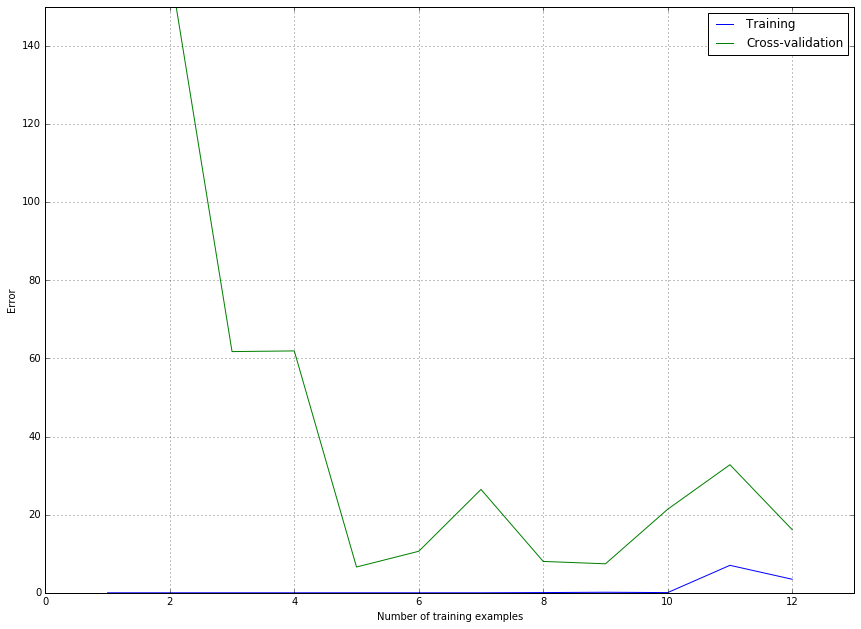

In [12]:
J_train_values = list()
J_cv_values = list()
for i in np.arange(1, m+1):
    param_poly = trainLinearReg(X_poly[:i,:], y[:i][:, np.newaxis], 0)
    # print param_poly.shape
    #param = trainLinearReg(np.c_[np.ones((i)), features[:i]], y[:i][:, np.newaxis], 0)
    
    J_train = linear_reg_cost_function(param_poly, X_poly[:i,:], ytrain[:, np.newaxis][:i,:], 0)
    J_cv = linear_reg_cost_function(param_poly, X_poly_val, yval[:, np.newaxis], 0)
    
    J_train_values.append(J_train)
    J_cv_values.append(J_cv)
    print  3*'-', J_train,3*'-', J_cv

    
plt.plot(np.arange(1, m+1), J_train_values, label='Training')
plt.plot(np.arange(1, m+1), J_cv_values, label='Cross-validation')
plt.legend()


fig = plt.gcf()
fig.set_size_inches(14.5, 10.5)
#fig.savefig('test2png.png', dpi=100)
#plt.autoscale(tight=True)

plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.grid()
plt.axis([0, 13, 0, 150])
plt.show()

[[ 11.2176]
 [ 11.2813]
 [ 14.7554]
 [ 11.4739]
 [-12.4539]
 [-15.3507]
 [  7.6451]
 [  3.9019]
 [ -4.9419]]
       8         7         6         5         4         3         2
1.612 x + 4.756 x - 5.622 x - 17.59 x + 3.232 x + 20.14 x + 11.74 x + 3.827 x + 2.527
[  1.6123057    4.75642929  -5.62243904 -17.59454117   3.23243192
  20.14206786  11.73662232   3.82670458   2.52667274]


/root/anaconda2/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/root/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


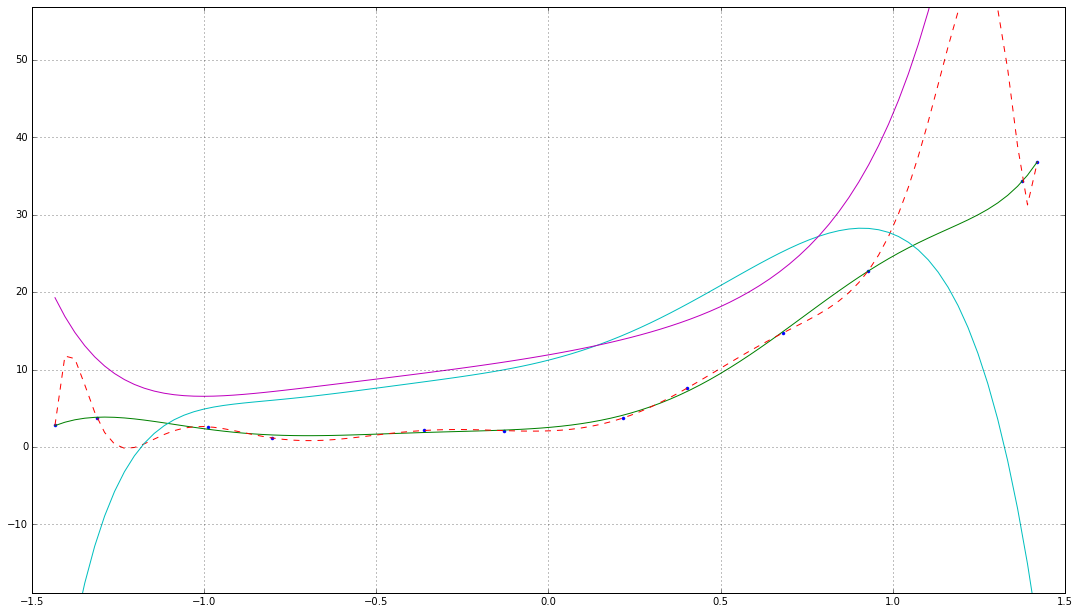

In [36]:
x = dam_data['X'].ravel()
y = dam_data['y'].ravel()

#z = np.polyfit(x, y, 2)
#p = np.poly1d(z)
print param_octave
po = np.poly1d(param_octave.ravel()[::-1])
ps = np.poly1d(param_poly.ravel()[::-1])
p = np.poly1d(np.polyfit(X_poly[:,1], y, 8))
print p
print p.coeffs
p30 = np.poly1d(np.polyfit(X_poly[:,1], y, 30))

xp = np.linspace(X_poly[:,1].min(), X_poly[:,1].max(), 100)
_ = plt.plot(X_poly[:,1], y, '.',xp, p(xp), '-', xp, p30(xp), '--', xp, po(xp), xp,ps(xp) )
plt.ylim(y.min()-20, y.max()+20)

#plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.grid()
plt.show()

In [16]:

#param_poly.shape